# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [2]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

C:\Users\Harbandana\AppData\Local\Temp\ipykernel_16304\560050414.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,transcript,full_name
George,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Ali Wong
Jacqueline,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Anthony Jeselnik
Kelsey,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Bill Burr
Leanne,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Bo Burnham
Roseanne,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Dave Chappelle
ali,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Hasan Minhaj
anthony,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAntho...,Jim Jefferies
bill,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nBILL ...,Joe Rogan
bo,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\nPage Not Found ...,John Mulaney
dave,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Louis C.K.


In [3]:
!pip install textblob


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

# calculates the polarity of a given text using TextBlob's sentiment analysis feature. 
# It returns a value between -1 (negative sentiment) and 1 (positive sentiment).
pol = lambda x: TextBlob(x).sentiment.polarity

# calculates the subjectivity of a given text using TextBlob. 
# It returns a value between 0 (objective) and 1 (subjective).
sub = lambda x: TextBlob(x).sentiment.subjectivity


# applied to the 'transcript' column of a DataFrame named data using the apply() method.
# The results are stored in new columns named 'polarity' and 'subjectivity' in the data DataFrame.

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
George,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Ali Wong,0.055889,0.488759
Jacqueline,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Anthony Jeselnik,0.104859,0.534973
Kelsey,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Bill Burr,0.078958,0.497085
Leanne,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Bo Burnham,0.119670,0.491257
Roseanne,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Dave Chappelle,0.128806,0.517473
ali,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Hasan Minhaj,0.072086,0.483713
anthony,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAntho...,Jim Jefferies,0.063745,0.555989
bill,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nBILL ...,Joe Rogan,0.017766,0.538031
bo,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\nPage Not Found ...,John Mulaney,0.562500,0.350000
dave,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Louis C.K.,0.001266,0.512781


C:\Users\Harbandana\AppData\Local\Temp\ipykernel_16304\3403844957.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)


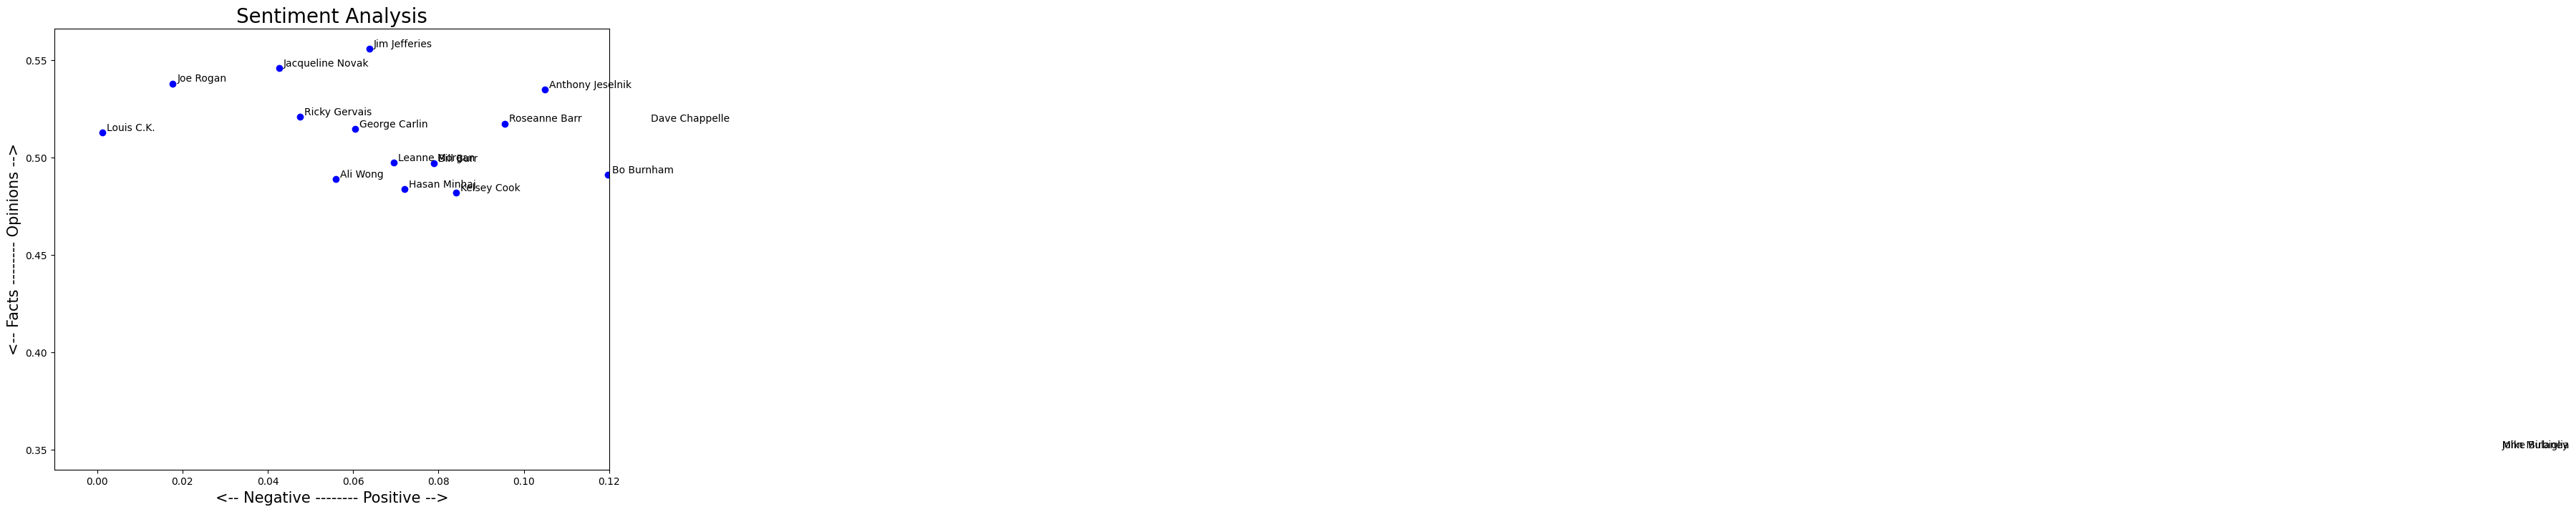

In [16]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,8]

# iterates over the index and comedian names
for index, comedian in enumerate(data.index):
    # it retrieves the polarity and subjectivity values from the DataFrame and assigns them to x and y, respectively.
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]

    # scatter point at coordinates (x, y) with a blue color.
    plt.scatter(x, y, color='blue')

    # text annotations for each point showing the comedian's full name.

    # .001 slightly offset from the scatter point horizontally.
    # .001 slightly offset from the scatter point vertically.
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)

    # x-axis limits are set between -.01 and .12 
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [17]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text and the starting points of each chunk of text
    length = len(text)
    # the size of each chunk of text(total length of the text by the number of parts)
    # floor function to ensure it is an integer.
    size = math.floor(length / n)
    # an array of starting indices for each chunk of text. It starts from 0, 
    # increments by the calculated size, and stops at the total length of the text.
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [18]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
George,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Ali Wong,0.055889,0.488759
Jacqueline,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Anthony Jeselnik,0.104859,0.534973
Kelsey,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Bill Burr,0.078958,0.497085
Leanne,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Bo Burnham,0.119670,0.491257
Roseanne,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Dave Chappelle,0.128806,0.517473
ali,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Hasan Minhaj,0.072086,0.483713
anthony,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAntho...,Jim Jefferies,0.063745,0.555989
bill,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nBILL ...,Joe Rogan,0.017766,0.538031
bo,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\nPage Not Found ...,John Mulaney,0.562500,0.350000
dave,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Louis C.K.,0.001266,0.512781


In [22]:
# Let's create a list to hold all of the pieces of text
# where a list list_pieces is created to hold all the pieces of text after splitting each text in data.transcript
# into multiple parts using the split_text() function previously defined.
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nGeorge Carlin: I\'m Glad I\'m Dead (2024) | Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n \n\n\n\n\n\n\r\n\t\tSkip to content\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\nSTANLEY KUBRICK\n\n\nTV SERIES\n\nTV SHOW TRANSCRIPTS\n\n\nCOMEDY\n\nSTAND-UP COMEDY TRANSCRIPTS\nGEORGE CARLIN\nDAVE CHAPPELLE\n\n\nINTERVIEWS\n\nPLAYBOY INTERVIEWS\n\n\nMUSIC\nHISTORY\nBOOKS\n \n\n Menu\n\n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\nSTANLEY KUBRICK\n\n\nTV SERIES\n\nTV SHOW TRANSCRIPTS\n\n\nCOMEDY\n\nSTAND-UP COMEDY TRANSCRIPTS\nGEORGE CARLIN\nDAVE CHAPPELLE\n\n\nINTERVIEWS\n\nPLAYBOY INTERVIEWS\n\n\nMUSIC\nHISTORY\nBOOKS\n \n\n\n\n\n\n\n\nSearch\n\n Search\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\nST

In [23]:
# The list has 10 elements, one for each transcript
len(list_pieces)

17

In [24]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [27]:
# Calculate the polarity for each piece of text
# mpty list polarity_transcript to store the polarity values for each text piece.
polarity_transcript = []

#  loops over each text piece in the list_pieces list.
for lp in list_pieces:

    # empty list polarity_piece to store the polarity values for the current text piece being processed.
    polarity_piece = []

    # iterates over each sentence or segment p in the current text piece lp.
    for p in lp:

        # each sentence or segment p, this line calculates the sentiment polarity 
        polarity_piece.append(TextBlob(p).sentiment.polarity)

    # the polarity_piece list containing these values is added to the polarity_transcript list.
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.11552749719416386,
  0.023711379482407518,
  0.006017103811221456,
  0.09047082797082795,
  0.04890753968253967,
  0.026986691354161253,
  0.08210359901536371,
  0.10005449907235625,
  5.065856129686726e-05,
  0.10134969625710367],
 [0.14130888376856116,
  0.15282490079365077,
  0.1581005690466306,
  0.04277502468291942,
  0.10608230261801686,
  0.09947920906254239,
  0.04783219481136145,
  0.047315276048152756,
  0.16387825963718816,
  0.08128306878306878],
 [0.09579788491078814,
  0.10855316836798316,
  -0.01410428460428462,
  0.13641308404239438,
  0.07804759928047598,
  0.12674878032020886,
  0.07201619022739712,
  0.03509859049332734,
  0.028006989538239536,
  0.14717248143477651],
 [0.13525974025974025,
  0.2079893113159242,
  0.09877000906070674,
  0.010407841777704792,
  0.14711295146077755,
  0.13630757220921155,
  0.11865189917609274,
  0.08175370842781551,
  0.18040430276793912,
  0.13123482726423905],
 [0.2073306650246305,
  0.15050166847041854,
  0.10077490016443504,
 

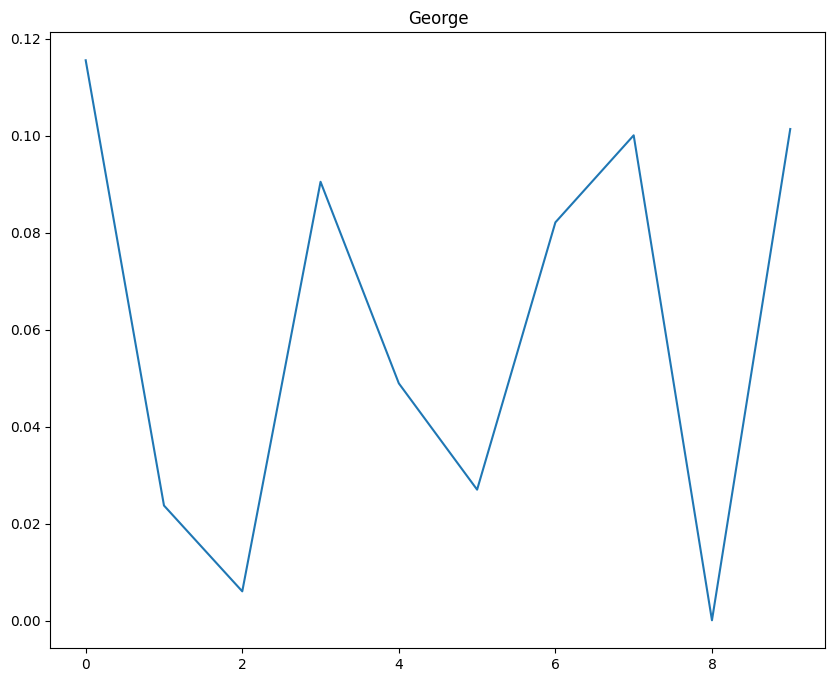

In [28]:
# Show the plot for one comedian
# plots the polarity values for the transcript of the 
# first comedian or the comedian indexed at position 0 i
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

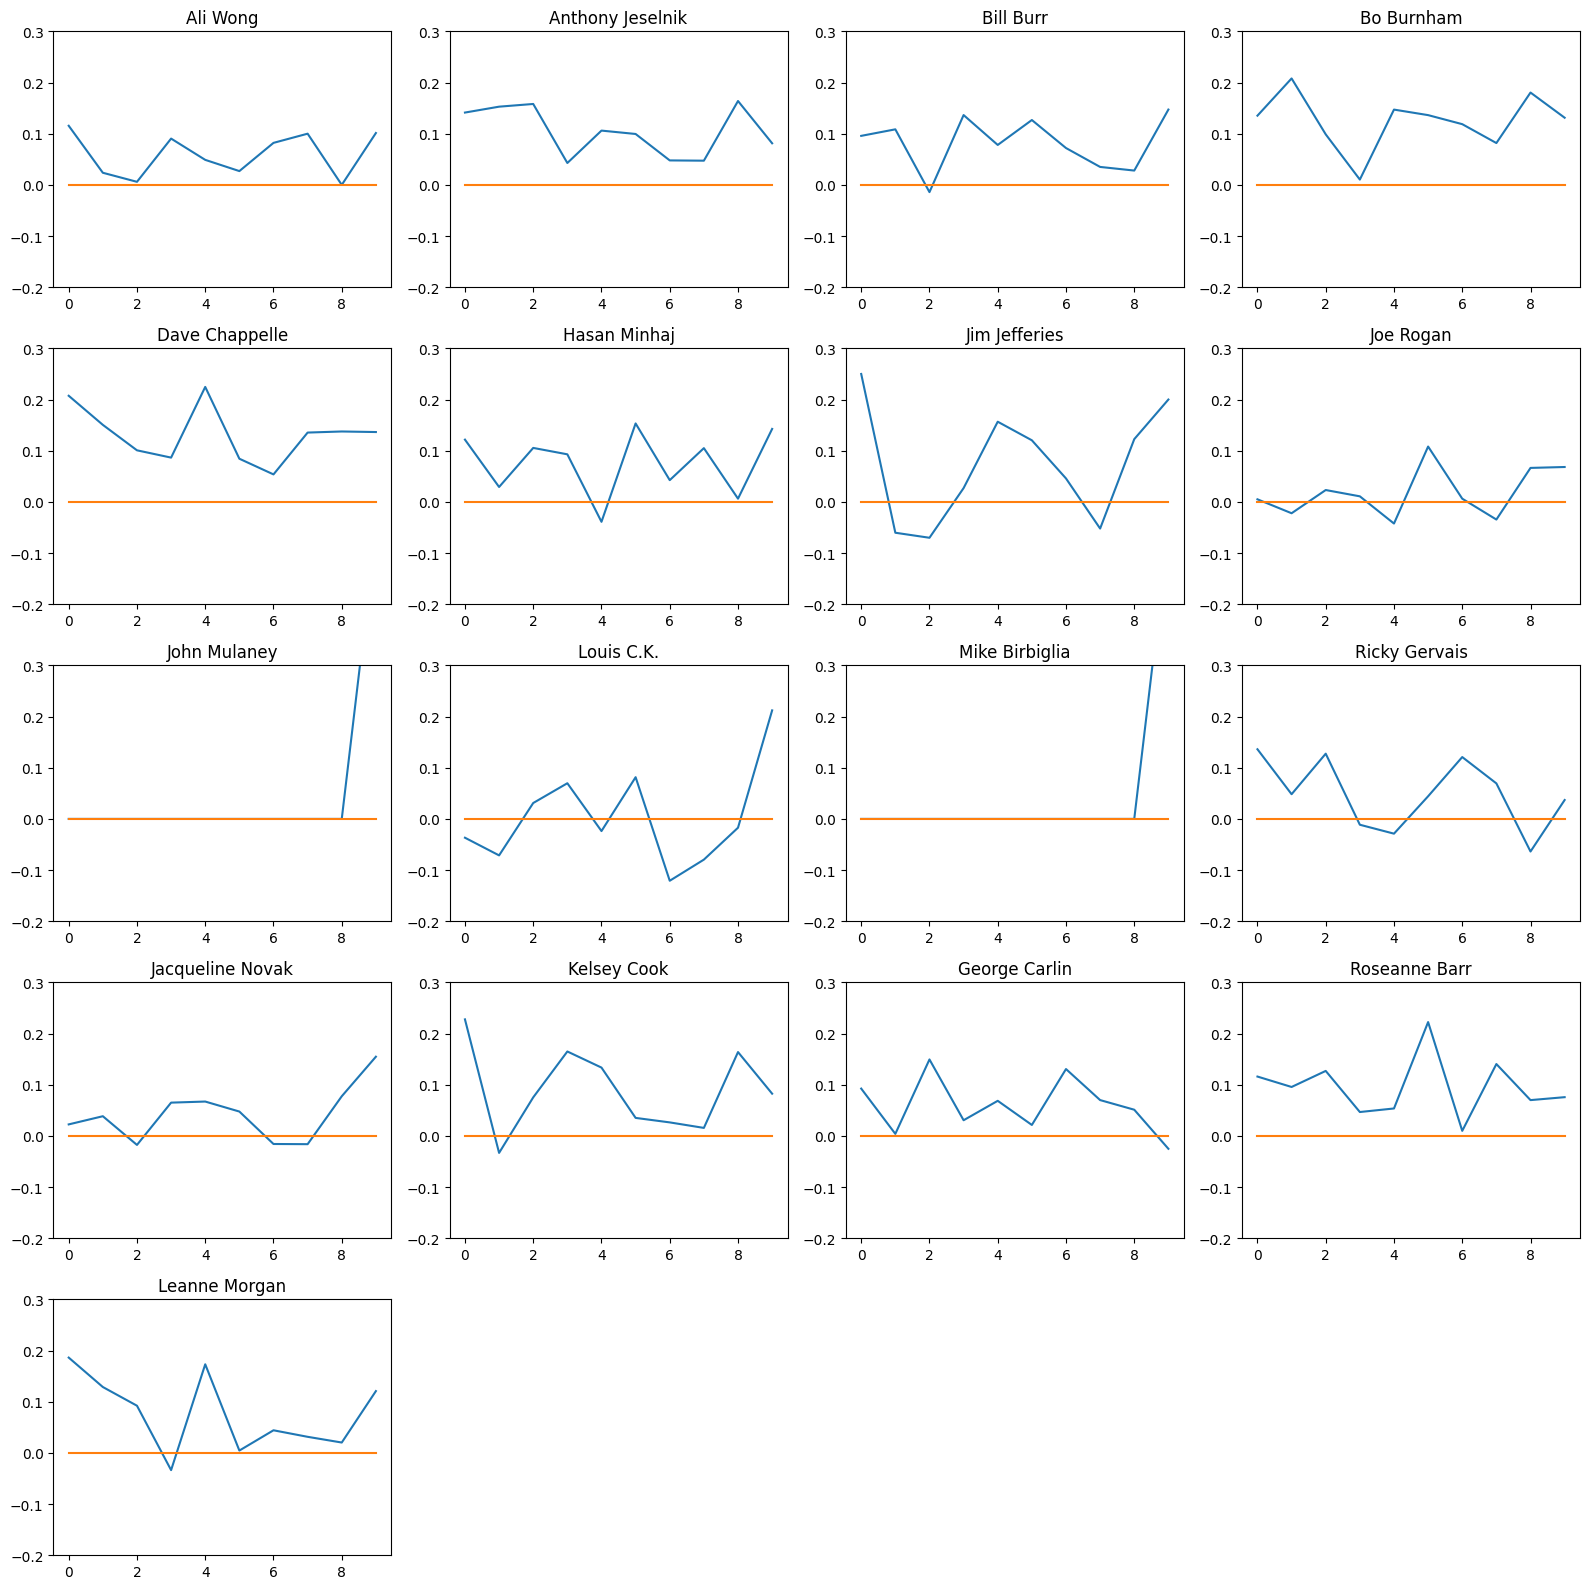

In [29]:

# sets the size of the figure that will contain all the subplots to 16x16 inches.
plt.rcParams['figure.figsize'] = [16, 16]

# the total number of comedians
num_comedians = len(data.index)

# calculates the number of rows required for the subplots by dividing the total number of comedians by 4 
# adding 1 to ensure all comedians are accommodated in case the count is not divisible by 4.
num_rows = (num_comedians // 4) + 1


for index, comedian in enumerate(data.index):   
    #  selects the next subplot, then starts plotting on that subplot.
    plt.subplot(num_rows, 4, index+1)

    # line plots the polarity values of the transcript
    plt.plot(polarity_transcript[index])

    # plots a horizontal line at y=0 for reference.
    plt.plot(np.arange(0, 10), np.zeros(10))

    # sets the title of the subplot to the full name of the current comedian.
    plt.title(data['full_name'].iloc[index])

    # sets the y-axis limits for the plot to be between -0.2 and 0.3.
    plt.ylim(ymin=-0.2, ymax=0.3)

# adjusts the spacing between subplots to avoid overlapping.
plt.tight_layout()
plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


In [31]:
# Classify movies based on average polarity and subjectivity

# creates a new column
# checks the average polarity value and assigns the label 'positive' if the value is greater than 0.05, otherwise 'negative'.
# positive or negative sentiment based on their average polarity score.
data['polarity_label'] = ['positive' if x > 0.05 else 'negative' for x in data['polarity']]

# creates another new column in the dataset called 'subjectivity_label'.
#  it evaluates the average subjectivity value and labels the movie as 'subjective' if the value is greater than 0.5, and 'objective' otherwise. 
# subjective or objective based on their average subjectivity score.
data['subjectivity_label'] = ['subjective' if x > 0.5 else 'objective' for x in data['subjectivity']]


print(data[['polarity_label', 'subjectivity_label']])

           polarity_label subjectivity_label
George           positive          objective
Jacqueline       positive         subjective
Kelsey           positive          objective
Leanne           positive          objective
Roseanne         positive         subjective
ali              positive          objective
anthony          positive         subjective
bill             negative         subjective
bo               positive          objective
dave             negative         subjective
hasan            positive          objective
jim              negative         subjective
joe              negative         subjective
john             positive          objective
louis            positive         subjective
mike             positive         subjective
ricky            positive          objective


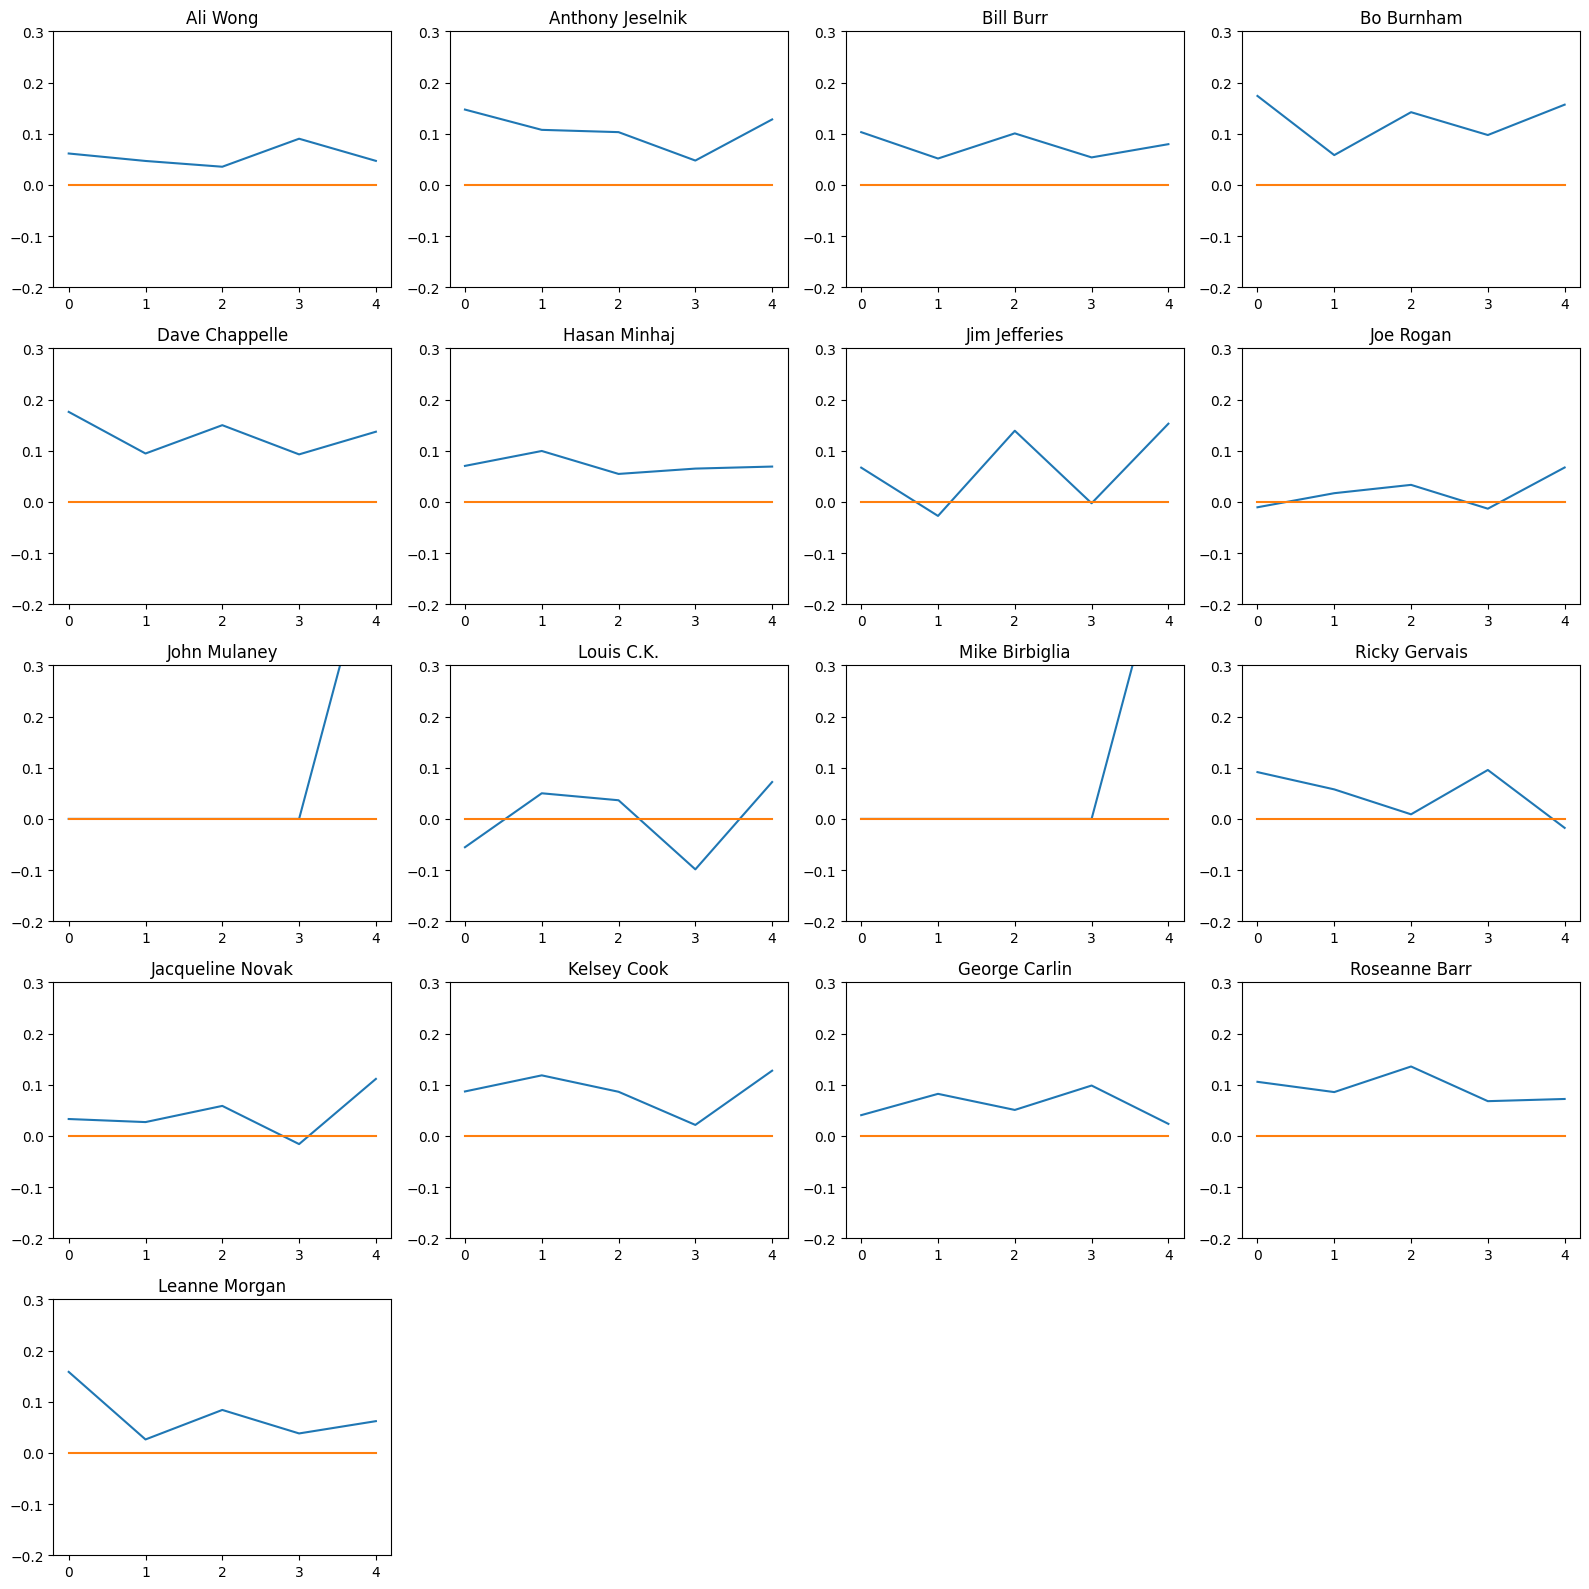

           0         1         2         3         4 sentiment
0   0.061348  0.046775  0.035493  0.090210  0.046938  Positive
1   0.147158  0.107535  0.103076  0.047572  0.127909  Positive
2   0.103023  0.051535  0.100608  0.053718  0.079561  Positive
3   0.173800  0.058201  0.142043  0.097423  0.156747  Positive
4   0.175856  0.094531  0.149881  0.092822  0.137105  Positive
5   0.070331  0.099478  0.054643  0.065064  0.069033  Positive
6   0.066951 -0.027423  0.139028 -0.002651  0.152765  Positive
7  -0.010495  0.017011  0.033281 -0.013257  0.067219  Negative
8   0.000000  0.000000  0.000000  0.000000  0.562500  Positive
9  -0.055350  0.050050  0.036419 -0.098584  0.072050  Negative
10  0.000000  0.000000  0.000000  0.000000  0.562500  Positive
11  0.091416  0.057655  0.008960  0.095581 -0.017547  Negative
12  0.032979  0.026996  0.058608 -0.016006  0.111360  Negative
13  0.086822  0.118279  0.086195  0.021444  0.127400  Positive
14  0.040527  0.082144  0.050729  0.098388  0.023495  P

In [33]:
# Let's split the text into 5 parts instead of 10
# initializes an empty list list_pieces that will store the split text pieces.
list_pieces = []

# terates through each transcript
for t in data.transcript:

    # transcript 't' is passed to a function or method named split_text() along with the parameter n=5. 
    # This function is presumably designed to split a given text into the number of parts is set to 5.
    split = split_text(t, n=5)  # Change the number here

    # esulting split text parts obtained from splitting the transcript 't' into 5 pieces 
    # are then added to the list_pieces list.
    list_pieces.append(split)

# Recalculate the polarity for each piece of text
# empty list named polarity_transcript that will store the polarity scores for each piece of text.
polarity_transcript = []

# lp in the list_pieces list. list_pieces likely contains segmented pieces of text or speech transcripts.
for lp in list_pieces:
    # polarity_piece to store the polarity scores for each individual segment
    polarity_piece = []

    # p in the current piece of text lp.
    for p in lp:

        # Sentiment polarity of the current segment p is calculated This score is then appended to the polarity_piece list.
        polarity_piece.append(TextBlob(p).sentiment.polarity)

    # he polarity_piece list, containing polarity scores for each segment, is appended to the polarity_transcript list. 
    polarity_transcript.append(polarity_piece)


plt.rcParams['figure.figsize'] = [16, 16]

num_comedians = len(data.index)
num_rows = (num_comedians // 4) + 1

for index, comedian in enumerate(data.index):    
    plt.subplot(num_rows, 4, index+1)

    # plots the sentiment polarity values for a specific index index from the polarity_transcript list.
    plt.plot(polarity_transcript[index])

    # plots a horizontal line at y=0 to represent the neutral sentiment. 
    # np.arange(0, 5) function creates an array from 0 to 4, 
    # and np.zeros(5) generates an array of zeroes of length 5. 
    # This line serves as a reference line for neutrality in the sentiment analysis plot.
    plt.plot(np.arange(0, 5), np.zeros(5))  # Adjust the range accordingly
    plt.title(data['full_name'].iloc[index])

    # This line sets the limits of the y-axis on the plot. The ymin=-0.2 and ymax=0.3 parameters specify the minimum and maximum values for the y-axis,
    plt.ylim(ymin=-0.2, ymax=0.3)
    
plt.tight_layout()
plt.show()



# Create a DataFrame for the polarity values
# polarity_df from the polarity_transcript list, which likely contains sentiment polarity values for different text segments.
polarity_df = pd.DataFrame(polarity_transcript)

# Classify each piece based on its polarity and subjectivity
#  calculates the mean polarity value for each text segment across columns (axis=1) and assigns a sentiment classification ('Positive', 'Neutral', or 'Negative') based on the mean polarity value.
polarity_df['sentiment'] = polarity_df.mean(axis=1).apply(lambda x: 'Positive' if x > 0.05 else ('Neutral' if x == 0 else 'Negative'))

# Calculate the subjectivity for each piece of text
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)

# Create a DataFrame for the subjectivity values
subjectivity_df = pd.DataFrame(subjectivity_transcript)

# Classify each piece based on its subjectivity
# alculates the mean subjectivity value for each text segment and assigns an opinion classification ('Fact' or 'Opinion') based on the mean subjectivity value.
subjectivity_df['opinion'] = subjectivity_df.mean(axis=1).apply(lambda x: 'Fact' if x > 0.5 else 'Opinion')

print(polarity_df)
print(subjectivity_df)

# Now you have two DataFrames: polarity_df and subjectivity_df, which contain the sentiment and opinion classifications for each piece of text, respectively.